In [2]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np

In [4]:
cpdISummer = TabularCPD(variable='IsSummer', variable_card=2, values=np.random.rand(2,1))
cpdHFlu = TabularCPD(variable='HasFlu', variable_card=2, values=np.random.rand(2,1))
cpdFPoison = TabularCPD(variable='HasFoodPoison', variable_card=2, values=np.random.rand(2,1))
cpdHRash = TabularCPD(variable='HasRash', variable_card=2, values=np.random.rand(2,1))
cpdHPneumonia = TabularCPD(variable='HasPneumonia', variable_card=2, values=np.random.rand(2,1))
cpdHHayFever = TabularCPD(variable='HasHayFever', variable_card=2, values=np.random.rand(2,8), evidence=['HasFoodPoison','IsSummer','HasPneumonia'], evidence_card=[2,2,2])
cpdHRespiratoryProblem = TabularCPD(variable='HasRespiratoryProblem', variable_card=2, values=np.random.rand(2,2), evidence=['HasPneumonia'], evidence_card=[2])
cpdHGastricProblem = TabularCPD(variable='HasGastricProblem', variable_card=2, values=np.random.rand(2,2), evidence=['HasFoodPoison'], evidence_card=[2])
cpdCoughs = TabularCPD(variable='Coughs', variable_card=2, values=np.random.rand(2,16), evidence=['HasHayFever','HasFlu','HasPneumonia','HasRespiratoryProblem'], evidence_card=[2,2,2,2])
cpdIsFatigued = TabularCPD(variable='IsFatigued', variable_card=2, values=np.random.rand(2,8), evidence=['HasFlu','HasPneumonia','HasFoodPoison'], evidence_card=[2,2,2])
cpdVomits = TabularCPD(variable='Vomits', variable_card=2, values=np.random.rand(2,4), evidence=['HasGastricProblem','HasFoodPoison'], evidence_card=[2,2])

In [5]:
model = BayesianNetwork()

In [6]:
model.add_nodes_from(['IsSummer','HasFlu','HasFoodPoison','HasRash','HasPneumonia','HasHayFever','HasRespiratoryProblem','HasGastricProblem','Coughs','IsFatigued','Vomits'])

In [7]:
model.add_edges_from([('HasHighFever', 'HasFoodPoison'), ('HasHighFever', 'IsSummer'),('HasHighFever', 'HasPneumonia'),('HasRespiratoryProblem','HasPneumonia'),('HasGastricProblem','HasFoodPoison'),('Coughs','HasHayFever'),('Coughs','HasFlu'),('Coughs','HasPneumonia'),('Coughs','HasRespiratoryProblem'),('IsFatigued','HasFlu'),('IsFatigued','HasPneumonia'),('IsFatigued','HasFoodPoison'),('Vomits','HasGastricProblem'),('Vomits','HasFoodPoison')])

In [8]:
model.nodes()

NodeView(('IsSummer', 'HasFlu', 'HasFoodPoison', 'HasRash', 'HasPneumonia', 'HasHayFever', 'HasRespiratoryProblem', 'HasGastricProblem', 'Coughs', 'IsFatigued', 'Vomits', 'HasHighFever'))

In [9]:
model.edges()

OutEdgeView([('HasRespiratoryProblem', 'HasPneumonia'), ('HasGastricProblem', 'HasFoodPoison'), ('Coughs', 'HasHayFever'), ('Coughs', 'HasFlu'), ('Coughs', 'HasPneumonia'), ('Coughs', 'HasRespiratoryProblem'), ('IsFatigued', 'HasFlu'), ('IsFatigued', 'HasPneumonia'), ('IsFatigued', 'HasFoodPoison'), ('Vomits', 'HasGastricProblem'), ('Vomits', 'HasFoodPoison'), ('HasHighFever', 'HasFoodPoison'), ('HasHighFever', 'IsSummer'), ('HasHighFever', 'HasPneumonia')])

In [10]:
model.add_cpds(
    cpdISummer,
    cpdHFlu,
    cpdFPoison,
    cpdHRash,
    cpdHPneumonia,
    cpdHHayFever,
    cpdHRespiratoryProblem,
    cpdHGastricProblem,
    cpdCoughs,
    cpdIsFatigued,
    cpdVomits

)

In [11]:
model.get_cpds()

[<TabularCPD representing P(IsSummer:2) at 0x7da90cae38b0>,
 <TabularCPD representing P(HasFlu:2) at 0x7da90cae3910>,
 <TabularCPD representing P(HasFoodPoison:2) at 0x7da90cae3880>,
 <TabularCPD representing P(HasRash:2) at 0x7da90cae3850>,
 <TabularCPD representing P(HasPneumonia:2) at 0x7da90cae3820>,
 <TabularCPD representing P(HasHayFever:2 | HasFoodPoison:2, IsSummer:2, HasPneumonia:2) at 0x7da90cae3790>,
 <TabularCPD representing P(HasRespiratoryProblem:2 | HasPneumonia:2) at 0x7da90cae3760>,
 <TabularCPD representing P(HasGastricProblem:2 | HasFoodPoison:2) at 0x7da90cae3730>,
 <TabularCPD representing P(Coughs:2 | HasHayFever:2, HasFlu:2, HasPneumonia:2, HasRespiratoryProblem:2) at 0x7da90cae38e0>,
 <TabularCPD representing P(IsFatigued:2 | HasFlu:2, HasPneumonia:2, HasFoodPoison:2) at 0x7da90cae36d0>,
 <TabularCPD representing P(Vomits:2 | HasGastricProblem:2, HasFoodPoison:2) at 0x7da90cae36a0>]

{'HasRespiratoryProblem': Text(0.3313566849726929, -0.29602399016254166, 'HasRespiratoryProblem'),
 'HasPneumonia': Text(0.5769887272486341, -0.40963055941971827, 'HasPneumonia'),
 'HasGastricProblem': Text(-0.31665060473498957, -0.6426916323792387, 'HasGastricProblem'),
 'HasFoodPoison': Text(-0.44606228277208687, -0.6885968451420942, 'HasFoodPoison'),
 'Coughs': Text(0.15819318398736934, 0.3008198383426252, 'Coughs'),
 'HasHayFever': Text(0.3371159821590907, 1.0, 'HasHayFever'),
 'HasFlu': Text(-0.522360001772004, 0.8250028458622205, 'HasFlu'),
 'IsFatigued': Text(-0.14100034430114106, -0.025852159971091294, 'IsFatigued'),
 'Vomits': Text(-0.42452004157506007, -0.6102708907493215, 'Vomits'),
 'HasHighFever': Text(0.10961285155862065, -0.1129752089705238, 'HasHighFever'),
 'IsSummer': Text(0.3373258452288745, 0.6602186025896838, 'IsSummer')}

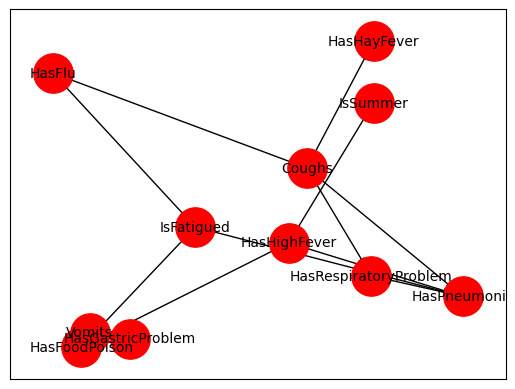

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, node_color='red', node_size=800)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos, font_color='black', font_size=10)


In [13]:
import numpy as np

with open('dataset.dat', 'r') as file:
    data = [int(line.strip()) for line in file]

binary_assignments = [format(assignment, '012b') for assignment in data]

counts = {v: np.zeros((2, 4)) for v in range(12)}

for binary in binary_assignments:
    for v, value in enumerate(binary):
        parent_index = int(binary[0] + binary[1], 2)
        counts[v][int(value), parent_index] += 1

cpds = {}
for v, count_matrix in counts.items():
    cpds[v] = count_matrix / count_matrix.sum(axis=0)

In [14]:
print("\nNormalized CPDs:")
for v, cpd in cpds.items():
    print(f"CPD for Variable {v}:")
    print(cpd)



Normalized CPDs:
CPD for Variable 0:
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]]
CPD for Variable 1:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]]
CPD for Variable 2:
[[0.83504666 0.5407462  0.71433653 0.27262998]
 [0.16495334 0.4592538  0.28566347 0.72737002]]
CPD for Variable 3:
[[0.82471611 0.79624673 0.68499472 0.50409583]
 [0.17528389 0.20375327 0.31500528 0.49590417]]
CPD for Variable 4:
[[0.8002959  0.79956659 0.80061387 0.79825464]
 [0.1997041  0.20043341 0.19938613 0.20174536]]
CPD for Variable 5:
[[0.98776836 0.51374204 0.94987397 0.20800231]
 [0.01223164 0.48625796 0.05012603 0.79199769]]
CPD for Variable 6:
[[0.88381198 0.83967702 0.66745264 0.39496974]
 [0.11618802 0.16032298 0.33254736 0.60503026]]
CPD for Variable 7:
[[0.99616278 0.92670582 0.9136007  0.3563578 ]
 [0.00383722 0.07329418 0.0863993  0.6436422 ]]
CPD for Variable 8:
[[0.79999149 0.80062538 0.80213839 0.80204174]
 [0.20000851 0.19937462 0.19786161 0.19795826]]
CPD for Variable 9:
[[0.92054845 0.69653715 0.91992235 0.81599638]
 [0.0794

In [49]:
# Define the CPDs with the normalized probabilities you've obtained
cpd_isSummer = TabularCPD(
    variable="IsSummer",
    variable_card=2,
    values=[[1], [0]]
)
cpd_hasFlu = TabularCPD(
    variable="HasFlu",
    variable_card=2,
    values=[[1, 0], [0, 1]],
    evidence=["IsSummer"],
    evidence_card=[2],
)
cpd_hasFoodPoisoning = TabularCPD(
    variable='HasFoodPoisoning',
    variable_card=2,
    values=[[0.83499899], [0.16500101]]
)
cpd_hasHayFever = TabularCPD(
    variable="HasHayFever",
    variable_card=2,
    values=[[0.82449657, 0.79544381], [0.17550343, 0.20455619]],
    evidence=["IsSummer"],
    evidence_card=[2],
)
cpd_hasPneumonia = TabularCPD(
    variable='HasPneumonia',
    variable_card=2,
    values=[[0.80012564], [0.19983117]]
)
cpd_hasRespiratoryProblems = TabularCPD(
    variable="HasRespiratoryProblems",
    variable_card=2,
    values=[
        [0.98773013, 0.51448624, 0.95013236, 0.20624204],
        [0.01226987, 0.48551376, 0.04986764, 0.79375796],
    ],
    evidence=["HasFlu", "HasPneumonia"],
    evidence_card=[2, 2],
)
cpd_hasGastricProblems = TabularCPD(
    variable="HasGastricProblems",
    variable_card=2,
    values=[[0.88376904, 0.83892846], [0.11623096, 0.16107154]],
    evidence=["HasFoodPoisoning"],
    evidence_card=[2],
)
cpd_hasRash = TabularCPD(
    variable="HasRash",
    variable_card=2,
    values=[
        [0.99614839, 0.92725476, 0.91451515, 0.35376373],
        [0.00385161, 0.07274524, 0.08548485, 0.64623627],
    ],
    evidence=["HasHayFever", "HasFoodPoisoning"],
    evidence_card=[2, 2],
)
cpd_coughs = TabularCPD(
    variable="Coughs",
    variable_card=2,
    values=[
        [0.79985891, 0.80006511, 0.80062379, 0.79978857, 0.80006511, 0.80062379, 0.79978857, 0.80006511],
        [0.20014109, 0.19993489, 0.19937621, 0.20021143, 0.19993489, 0.19937621, 0.20021143, 0.19993489]
    ],
    evidence=["HasFlu", "HasRespiratoryProblems", "HasPneumonia"],
    evidence_card=[2, 2, 2],
)
cpd_isFatigued = TabularCPD(
    variable="IsFatigued",
    variable_card=2,
    values=[
        [0.92038893, 0.69679735, 0.91953257, 0.81965835],
        [0.07961107, 0.30320265, 0.08046743, 0.18034165],
    ],
    evidence=["HasFlu", "HasPneumonia"],
    evidence_card=[2, 2],
)
cpd_vomits = TabularCPD(
    variable="Vomits",
    variable_card=2,
    values=[
        [0.98339969, 0.98413083, 0.48677252, 0.75469114],
        [0.01660031, 0.01586917, 0.51322748, 0.24530886],
    ],
    evidence=["HasFoodPoisoning", "HasGastricProblems"],
    evidence_card=[2, 2],
)
cpd_hasFever = TabularCPD(
    variable="HasFever",
    variable_card=2,
    values=[
        [0.74556394, 0.7451482, 0.8425909, 0.78900074],
        [0.25443606, 0.2548518, 0.1574091, 0.21099926],
    ],
    evidence=["HasFlu", "HasPneumonia"],
    evidence_card=[2, 2],
)

In [50]:
modelFromData = BayesianNetwork()

modelFromData.add_nodes_from([
    'IsSummer',
    'HasFlu',
    'HasFoodPoisoning',
    'HasHayFever',
    'HasPneumonia',
    'HasRespiratoryProblems',
    'HasGastricProblems',
    'HasRash',
    'Coughs',
    'IsFatigued',
    'Vomits',
    'HasFever'])

modelFromData.add_edges_from([
    ('IsSummer', 'HasFlu'),
    ('IsSummer', 'HasHayFever'),
    ('HasFlu', 'HasRespiratoryProblems'),
    ('HasFlu', 'IsFatigued'),
    ('HasFlu', 'HasFever'),
    ('HasFlu', 'Coughs'),
    ('HasHayFever', 'HasRash'),
    ('HasFoodPoisoning', 'HasGastricProblems'),
    ('HasFoodPoisoning', 'Vomits'),
    ('HasFoodPoisoning', 'HasRash'),
    ('HasPneumonia', 'HasRespiratoryProblems'),
    ('HasPneumonia', 'IsFatigued'),
    ('HasPneumonia', 'Coughs'),
    ('HasPneumonia', 'HasFever'),
    ('HasGastricProblems', 'Vomits'),
    ('HasRespiratoryProblems', 'Coughs')])

In [53]:
modelFromData.add_cpds(
    cpd_isSummer,
    cpd_hasFlu,
    cpd_hasFoodPoisoning,
    cpd_hasHayFever,
    cpd_hasPneumonia,
    cpd_hasRespiratoryProblems,
    cpd_hasGastricProblems,
    cpd_hasRash,
    cpd_coughs,
    cpd_isFatigued,
    cpd_vomits,
    cpd_hasFever
)

{'HasRespiratoryProblem': Text(-0.13815579934469147, 0.4543064352161843, 'HasRespiratoryProblem'),
 'HasPneumonia': Text(-0.2824227767043785, 0.564936127801509, 'HasPneumonia'),
 'HasGastricProblem': Text(0.4174621059681134, 0.4176379196200535, 'HasGastricProblem'),
 'HasFoodPoison': Text(0.5642620622176401, 0.5530245694875592, 'HasFoodPoison'),
 'Coughs': Text(-0.3110202040807572, -0.11091992804868774, 'Coughs'),
 'HasHayFever': Text(-0.22695896844999963, -0.9031536908332611, 'HasHayFever'),
 'HasFlu': Text(-0.6871468114928576, -0.4290123739718966, 'HasFlu'),
 'IsFatigued': Text(-0.11967508712287503, 0.1608719041803651, 'IsFatigued'),
 'Vomits': Text(0.37666393192823266, 0.343879345594653, 'Vomits'),
 'HasHighFever': Text(0.1715351070624847, -0.051570309046478836, 'HasHighFever'),
 'IsSummer': Text(0.2354564400190887, -1.0, 'IsSummer')}

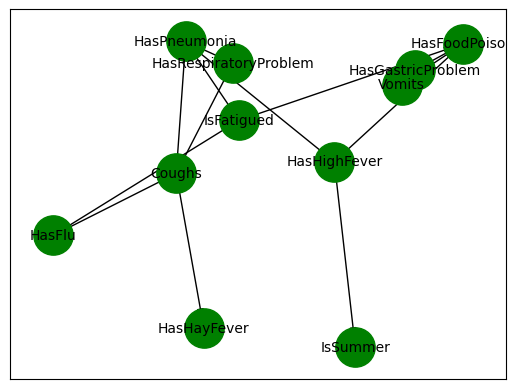

In [55]:
graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, node_color='green', node_size=800)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos, font_color='black', font_size=10)


In [56]:
inference = VariableElimination(modelFromData)

In [60]:
prob_Fatigued = inference.query(variables=['IsFatigued'])

print(prob_Fatigued)

+---------------+-------------------+
| IsFatigued    |   phi(IsFatigued) |
+===============+===================+
| IsFatigued(0) |            0.8757 |
+---------------+-------------------+
| IsFatigued(1) |            0.1243 |
+---------------+-------------------+


In [61]:
def calculate_kl_divergence(model_probs, true_probs):
    return sum(p_true * np.log(p_true / p_model) for p_model, p_true in zip(model_probs, true_probs) if p_model > 0 and p_true > 0)

In [62]:
result = inference.query(['Coughs'], evidence={'HasFlu': 1,'HasRespiratoryProblems': 0,'HasPneumonia': 0})
result = inference.query(['IsSummer', 'HasFlu', 'HasFoodPoisoning', 'HasHayFever', 'HasPneumonia', 'HasRespiratoryProblems', 'HasGastricProblems', 'HasRash', 'Coughs', 'IsFatigued', 'Vomits', 'HasFever'])
print(result)

+-------------+-----------+---------------------+----------------+-----------------+---------------------------+-----------------------+------------+-----------+---------------+-----------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
| IsSummer    | HasFlu    | HasFoodPoisoning    | HasHayFever    | HasPneumonia    | HasRespiratoryProblems    | HasGastricProblems    | HasRash    | Coughs    | IsFatigued    | Vomits    | HasFever    |   phi(IsSummer,HasFlu,HasFoodPoisoning,HasHayFever,HasPneumonia,HasRespiratoryProblems,HasGastricProblems,HasRash,Coughs,IsFatigued,Vomits,HasFever) |
+=============+===========+=====================+================+=================+===========================+=======================+============+===========+===============+===========+=============+=======================================================================================

In [64]:
def generate_bit_strings(num_variables):
    bit_strings = []
    for i in range(2 ** num_variables):
        bin_str = format(i, '0{}b'.format(num_variables))
        bit_strings.append(bin_str)
    return bit_strings

bit_strings = generate_bit_strings(12)
print(bit_strings)

def bit_string_to_values(bit_string, num_variables):
    values = []
    for i in range(num_variables):
        values.append(int(bit_string[i]))
    return values

example_bit_string = '100000000000'
values = bit_string_to_values(example_bit_string, 12)
print("The aactual values")
print(values)

['000000000000', '000000000001', '000000000010', '000000000011', '000000000100', '000000000101', '000000000110', '000000000111', '000000001000', '000000001001', '000000001010', '000000001011', '000000001100', '000000001101', '000000001110', '000000001111', '000000010000', '000000010001', '000000010010', '000000010011', '000000010100', '000000010101', '000000010110', '000000010111', '000000011000', '000000011001', '000000011010', '000000011011', '000000011100', '000000011101', '000000011110', '000000011111', '000000100000', '000000100001', '000000100010', '000000100011', '000000100100', '000000100101', '000000100110', '000000100111', '000000101000', '000000101001', '000000101010', '000000101011', '000000101100', '000000101101', '000000101110', '000000101111', '000000110000', '000000110001', '000000110010', '000000110011', '000000110100', '000000110101', '000000110110', '000000110111', '000000111000', '000000111001', '000000111010', '000000111011', '000000111100', '000000111101', '000000

In [65]:
for bit_string in bit_strings:
    evidence_values = bit_string_to_values(bit_string, 12)
    evidence_dict = dict(zip(modelFromData.nodes(), evidence_values))

    # Remove the variable you want to infer from the evidence dictionary
    target_variable = 'Vomits'
    del evidence_dict[target_variable]

    inference_result = inference.query(variables=[target_variable], evidence=evidence_dict)
    print(f"Bit string: {bit_string}; Result: {inference_result}")

Streaming output truncated to the last 5000 lines.
| Vomits(1) |        0.0159 |
+-----------+---------------+
Bit string: 110100110110; Result: +-----------+---------------+
| Vomits    |   phi(Vomits) |
+===========+===============+
| Vomits(0) |        0.9841 |
+-----------+---------------+
| Vomits(1) |        0.0159 |
+-----------+---------------+
Bit string: 110100110111; Result: +-----------+---------------+
| Vomits    |   phi(Vomits) |
+===========+===============+
| Vomits(0) |        0.9841 |
+-----------+---------------+
| Vomits(1) |        0.0159 |
+-----------+---------------+
Bit string: 110100111000; Result: +-----------+---------------+
| Vomits    |   phi(Vomits) |
+===========+===============+
| Vomits(0) |        0.9841 |
+-----------+---------------+
| Vomits(1) |        0.0159 |
+-----------+---------------+
Bit string: 110100111001; Result: +-----------+---------------+
| Vomits    |   phi(Vomits) |
+===========+===============+
| Vomits(0) |        0.9841 |
+--

In [66]:
def get_state(bit_string_value, num_variables=12):
    bit_string = format(bit_string_value, 'b').zfill(num_variables)
    bit_string = bit_string[::-1]
    state = list(map(int, bit_string))
    return state
state_0 = get_state(0)
print(state_0)

state_1 = get_state(1)
print(state_1)
state_2 = get_state(2)
print(state_2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [67]:
# Define the evidence
evidence = {'IsSummer': 1}

# List of variables not in evidence
variables_not_in_evidence = [
    'HasFlu', 'HasFoodPoisoning', 'HasHayFever', 'HasPneumonia',
    'HasRespiratoryProblems', 'HasGastricProblems', 'HasRash',
    'Coughs', 'IsFatigued', 'Vomits', 'HasFever'
]

# Perform the query with the evidence
joint_distribution_given_evidence = inference.query(variables=variables_not_in_evidence, evidence=evidence)
print(joint_distribution_given_evidence)

+-----------+---------------------+----------------+-----------------+---------------------------+-----------------------+------------+-----------+---------------+-----------+-------------+---------------------------------------------------------------------------------------------------------------------------------------------+
| HasFlu    | HasFoodPoisoning    | HasHayFever    | HasPneumonia    | HasRespiratoryProblems    | HasGastricProblems    | HasRash    | Coughs    | IsFatigued    | Vomits    | HasFever    |   phi(HasFlu,HasFoodPoisoning,HasHayFever,HasPneumonia,HasRespiratoryProblems,HasGastricProblems,HasRash,Coughs,IsFatigued,Vomits,HasFever) |
+===========+=====================+================+=================+===========================+=======================+============+===========+===============+===========+=============+=============================================================================================================================================+
| Ha

In [68]:
import itertools

node_order = [
    'IsSummer',
    'HasFlu',
    'HasFoodPoisoning',
    'HasHayFever',
    'HasPneumonia',
    'HasRespiratoryProblems',
    'HasGastricProblems',
    'HasRash',
    'Coughs',
    'IsFatigued',
    'Vomits',
    'HasFever'
]

bit_combinations = list(itertools.product([0, 1], repeat=12))

for bits in bit_combinations:
    joint_probability = 1.0
    for i, bit in enumerate(bits):
        variable_name = node_order[i]
        evidence = {node: value for node, value in zip(node_order[:i], bits[:i])}

        result = inference.query(variables=[variable_name], evidence=evidence)
        probability = result.get_value(**{variable_name: bit})

        joint_probability *= probability

    print(f"Bits: {bits}, Joint Probability: {joint_probability}")

Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), Joint Probability: 0.25855480103757245
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), Joint Probability: 0.08823611408846282
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), Joint Probability: 0.004364542609538573
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), Joint Probability: 0.0014894725531831824
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), Joint Probability: 0.02236426764089639
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), Joint Probability: 0.007632177252745315
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), Joint Probability: 0.00037752073702794107
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1), Joint Probability: 0.0001288352128426241
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0), Joint Probability: 0.06469570952756265
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1), Joint Probability: 0.02207848388039999
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0), Joint Probability: 0.0010920979991639957
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1), Joint Probability: 0.00037269655

In [69]:
import itertools

node_order = [
    'IsSummer',
    'HasFlu',
    'HasFoodPoisoning',
    'HasHayFever',
    'HasPneumonia',
    'HasRespiratoryProblems',
    'HasGastricProblems',
    'HasRash',
    'Coughs',
    'IsFatigued',
    'Vomits',
    'HasFever'
]

true_values = []
with open('joint.dat', 'r') as file:
    for line in file:
        _, value = line.strip().split('\t')
        true_values.append(float(value))

bit_combinations = list(itertools.product([0, 1], repeat=12))

total_distance = 0

for bits, true_value in zip(bit_combinations, true_values):
    joint_probability = 1.0
    for i, bit in enumerate(bits):
        variable_name = node_order[i]
        evidence = {node: value for node, value in zip(node_order[:i], bits[:i])}

        result = inference.query(variables=[variable_name], evidence=evidence)
        probability = result.get_value(**{variable_name: bit})

        joint_probability *= probability

    distance = abs(joint_probability - true_value)
    total_distance += distance

    print(f"Bits: {bits}, Joint Probability: {joint_probability}, True Value: {true_value}, Distance: {distance}")

average_distance = total_distance / len(bit_combinations)
print(f"Total L1 Distance: {total_distance}")
print(f"Average L1 Distance: {average_distance}")

Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), Joint Probability: 0.25855480103757245, True Value: 0.29425875824822, Distance: 0.03570395721064756
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), Joint Probability: 0.08823611408846282, True Value: 0.10221620023359, Distance: 0.013980086145127177
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), Joint Probability: 0.004364542609538573, True Value: 0.0038311201152, Distance: 0.0005334224943385731
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), Joint Probability: 0.0014894725531831824, True Value: 0.00025540800768, Distance: 0.0012340645455031823
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), Joint Probability: 0.02236426764089639, True Value: 0.02335386970224, Distance: 0.00098960206134361
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), Joint Probability: 0.007632177252745315, True Value: 0.00811239684394, Distance: 0.0004802195911946857
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), Joint Probability: 0.00037752073702794107, True Value: 0.000304057152, Distance: 7

In [70]:
node_order = [
    'IsSummer',
    'HasFlu',
    'HasFoodPoisoning',
    'HasHayFever',
    'HasPneumonia',
    'HasRespiratoryProblems',
    'HasGastricProblems',
    'HasRash',
    'Coughs',
    'IsFatigued',
    'Vomits',
    'HasFever'
]


true_values = []
with open('joint.dat', 'r') as file:
    for line in file:
        _, value = line.strip().split('\t')
        true_values.append(float(value))

bit_combinations = list(itertools.product([0, 1], repeat=12))

total_distance = 0
correct_predictions = 0
threshold = 0.0001829251979650137

for bits, true_value in zip(bit_combinations, true_values):
    joint_probability = 1.0
    for i, bit in enumerate(bits):
        variable_name = node_order[i]
        evidence = {node: value for node, value in zip(node_order[:i], bits[:i])}

        result = inference.query(variables=[variable_name], evidence=evidence)
        probability = result.get_value(**{variable_name: bit})

        joint_probability *= probability
    distance = abs(joint_probability - true_value)
    total_distance += distance

    if distance <= threshold:
        correct_predictions += 1

    print(f"Bits: {bits}, Joint Probability: {joint_probability}, True Value: {true_value}, Distance: {distance}")

average_distance = total_distance / len(bit_combinations)
accuracy = correct_predictions / len(bit_combinations)

print(f"Total L1 Distance: {total_distance}")
print(f"Average L1 Distance: {average_distance}")
print(f"Accuracy: {accuracy}")

Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), Joint Probability: 0.25855480103757245, True Value: 0.29425875824822, Distance: 0.03570395721064756
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), Joint Probability: 0.08823611408846282, True Value: 0.10221620023359, Distance: 0.013980086145127177
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), Joint Probability: 0.004364542609538573, True Value: 0.0038311201152, Distance: 0.0005334224943385731
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), Joint Probability: 0.0014894725531831824, True Value: 0.00025540800768, Distance: 0.0012340645455031823
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), Joint Probability: 0.02236426764089639, True Value: 0.02335386970224, Distance: 0.00098960206134361
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), Joint Probability: 0.007632177252745315, True Value: 0.00811239684394, Distance: 0.0004802195911946857
Bits: (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), Joint Probability: 0.00037752073702794107, True Value: 0.000304057152, Distance: 7

In [71]:
evidence = {'HasFlu': 1}
result = inference.query(variables=['HasRash', 'Coughs', 'IsFatigued', 'Vomits', 'HasFever'], evidence=evidence)
print(result)

+------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash    | Coughs    | IsFatigued    | Vomits    | HasFever    |   phi(HasRash,Coughs,IsFatigued,Vomits,HasFever) |
+============+===========+===============+===========+=============+==================================================+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(0) | HasFever(0) |                                              nan |
+------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(0) | HasFever(1) |                                              nan |
+------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(1) | HasFever(0) |                                              nan |
+------------+-----------+--------------

/usr/local/lib/python3.10/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:488: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


In [72]:
evidence = {'IsSummer': 1}
result = inference.query(variables=['HasFlu'], evidence=evidence)
print(result)

+-----------+---------------+
| HasFlu    |   phi(HasFlu) |
+===========+===============+
| HasFlu(0) |        0.0000 |
+-----------+---------------+
| HasFlu(1) |        1.0000 |
+-----------+---------------+


In [73]:
evidence = {'HasHayFever': 1}
result = inference.query(variables=['HasFever'], evidence=evidence)
print(result)

+-------------+-----------------+
| HasFever    |   phi(HasFever) |
+=============+=================+
| HasFever(0) |          0.7455 |
+-------------+-----------------+
| HasFever(1) |          0.2545 |
+-------------+-----------------+


In [74]:
evidence = {'IsSummer': 1}
result = inference.query(variables=['HasFlu', 'HasHayFever'], evidence=evidence)
print(result)

+-----------+----------------+---------------------------+
| HasFlu    | HasHayFever    |   phi(HasFlu,HasHayFever) |
+===========+================+===========================+
| HasFlu(0) | HasHayFever(0) |                    0.0000 |
+-----------+----------------+---------------------------+
| HasFlu(0) | HasHayFever(1) |                    0.0000 |
+-----------+----------------+---------------------------+
| HasFlu(1) | HasHayFever(0) |                    0.7954 |
+-----------+----------------+---------------------------+
| HasFlu(1) | HasHayFever(1) |                    0.2046 |
+-----------+----------------+---------------------------+


In [75]:
evidence = {'HasHayFever': 1}
result = inference.query(variables=['HasFever', 'HasRespiratoryProblems'], evidence=evidence)
print(result)

+-------------+---------------------------+----------------------------------------+
| HasFever    | HasRespiratoryProblems    |   phi(HasFever,HasRespiratoryProblems) |
+=============+===========================+========================================+
| HasFever(0) | HasRespiratoryProblems(0) |                                 0.6659 |
+-------------+---------------------------+----------------------------------------+
| HasFever(0) | HasRespiratoryProblems(1) |                                 0.0796 |
+-------------+---------------------------+----------------------------------------+
| HasFever(1) | HasRespiratoryProblems(0) |                                 0.2273 |
+-------------+---------------------------+----------------------------------------+
| HasFever(1) | HasRespiratoryProblems(1) |                                 0.0272 |
+-------------+---------------------------+----------------------------------------+


In [76]:
evidence = {'Coughs': 1}
result = inference.query(variables=['HasFlu', 'HasPneumonia'], evidence=evidence)
print(result)

+-----------+-----------------+----------------------------+
| HasFlu    | HasPneumonia    |   phi(HasFlu,HasPneumonia) |
+===========+=================+============================+
| HasFlu(0) | HasPneumonia(0) |                     0.8002 |
+-----------+-----------------+----------------------------+
| HasFlu(0) | HasPneumonia(1) |                     0.1998 |
+-----------+-----------------+----------------------------+
| HasFlu(1) | HasPneumonia(0) |                     0.0000 |
+-----------+-----------------+----------------------------+
| HasFlu(1) | HasPneumonia(1) |                     0.0000 |
+-----------+-----------------+----------------------------+


In [77]:
evidence = {'HasRespiratoryProblems': 1}
result = inference.query(variables=['HasFlu', 'HasPneumonia'], evidence=evidence)
print(result)

+-----------+-----------------+----------------------------+
| HasFlu    | HasPneumonia    |   phi(HasFlu,HasPneumonia) |
+===========+=================+============================+
| HasFlu(0) | HasPneumonia(0) |                     0.0919 |
+-----------+-----------------+----------------------------+
| HasFlu(0) | HasPneumonia(1) |                     0.9081 |
+-----------+-----------------+----------------------------+
| HasFlu(1) | HasPneumonia(0) |                     0.0000 |
+-----------+-----------------+----------------------------+
| HasFlu(1) | HasPneumonia(1) |                     0.0000 |
+-----------+-----------------+----------------------------+


In [78]:
evidence = {'Coughs': 1, 'HasFever': 1}
result = inference.query(variables=['HasFlu', 'HasPneumonia', 'HasRespiratoryProblems'], evidence=evidence)
print(result)

+-----------+-----------------+---------------------------+---------------------------------------------------+
| HasFlu    | HasPneumonia    | HasRespiratoryProblems    |   phi(HasFlu,HasPneumonia,HasRespiratoryProblems) |
+===========+=================+===========================+===================================================+
| HasFlu(0) | HasPneumonia(0) | HasRespiratoryProblems(0) |                                            0.7902 |
+-----------+-----------------+---------------------------+---------------------------------------------------+
| HasFlu(0) | HasPneumonia(0) | HasRespiratoryProblems(1) |                                            0.0098 |
+-----------+-----------------+---------------------------+---------------------------------------------------+
| HasFlu(0) | HasPneumonia(1) | HasRespiratoryProblems(0) |                                            0.1029 |
+-----------+-----------------+---------------------------+---------------------------------------------

In [79]:
evidence = {'HasPneumonia': 1, 'HasGastricProblems': 1}
result = inference.query(variables=['HasRespiratoryProblems', 'HasFever'], evidence=evidence)
print(result)

+---------------------------+-------------+----------------------------------------+
| HasRespiratoryProblems    | HasFever    |   phi(HasRespiratoryProblems,HasFever) |
+===========================+=============+========================================+
| HasRespiratoryProblems(0) | HasFever(0) |                                 0.3834 |
+---------------------------+-------------+----------------------------------------+
| HasRespiratoryProblems(0) | HasFever(1) |                                 0.1311 |
+---------------------------+-------------+----------------------------------------+
| HasRespiratoryProblems(1) | HasFever(0) |                                 0.3618 |
+---------------------------+-------------+----------------------------------------+
| HasRespiratoryProblems(1) | HasFever(1) |                                 0.1237 |
+---------------------------+-------------+----------------------------------------+


In [80]:
evidence = {'HasPneumonia': 1, 'HasGastricProblems': 1}
result = inference.query(variables=['HasRash', 'Coughs'], evidence=evidence)
print(result)

+------------+-----------+-----------------------+
| HasRash    | Coughs    |   phi(HasRash,Coughs) |
+============+===========+=======================+
| HasRash(0) | Coughs(0) |                0.7587 |
+------------+-----------+-----------------------+
| HasRash(0) | Coughs(1) |                0.1898 |
+------------+-----------+-----------------------+
| HasRash(1) | Coughs(0) |                0.0412 |
+------------+-----------+-----------------------+
| HasRash(1) | Coughs(1) |                0.0103 |
+------------+-----------+-----------------------+


In [83]:
evidence = {'HasPneumonia': 1, 'HasGastricProblems': 1}
result = inference.query(variables=['HasRespiratoryProblems', 'HasRash'], evidence=evidence)
print(result)

+---------------------------+------------+---------------------------------------+
| HasRespiratoryProblems    | HasRash    |   phi(HasRespiratoryProblems,HasRash) |
+===========================+============+=======================================+
| HasRespiratoryProblems(0) | HasRash(0) |                                0.4880 |
+---------------------------+------------+---------------------------------------+
| HasRespiratoryProblems(0) | HasRash(1) |                                0.0265 |
+---------------------------+------------+---------------------------------------+
| HasRespiratoryProblems(1) | HasRash(0) |                                0.4605 |
+---------------------------+------------+---------------------------------------+
| HasRespiratoryProblems(1) | HasRash(1) |                                0.0250 |
+---------------------------+------------+---------------------------------------+


In [85]:
evidence = {'IsSummer': 1}
result = inference.query(variables=['Vomits'], evidence=evidence)
vomiting_probability = result.values[1]
print(vomiting_probability)

0.09135287124326608
